<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/Feature_Engineering_Metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# **Um guia de referência para métodos de engenharia de atributos**


Olá amigos,


**Engenharia de atributos** é a base de qualquer modelo de aprendizado de máquina. O sucesso de qualquer modelo de aprendizado de máquina depende da aplicação de várias técnicas de engenharia de recursos. Portanto, neste kernel, discutirei várias técnicas de **Engenharia de atributos** que nos ajudarão a extrair, preparar e projetar recursos de nosso conjunto de dados de maneira adequada.

Então vamos começar.

- Este kernel é baseado no curso de Soledad Galli - [Feature Engineering for Machine Learning] (https://www.udemy.com/course/feature-engineering-for-machine-learning/) e seu artigo - [Feature Engineering for Machine Aprendendo; Uma visão geral abrangente] (https://www.trainindata.com/post/feature-engineering-comprehensive-overview).

- Ela fez um trabalho fabuloso no curso acima, onde reuniu todas as principais técnicas de engenharia de recursos em um só lugar. Eu adaptei o código e as instruções de seu curso e artigo neste kernel. Eu gosto de parabenizá-la 
por seu excelente trabalho.

<a class="anchor" id="0.1"></a>
## Índice


Introdução à Engenharia de Recursos 
2. Visão geral das técnicas de engenharia de atributos 
3.Imputação de dados ausentes
   - 3.1 Análise de Caso Completa
   - 3.2 Média / Mediana / Imputação de modo
   - 3.3 Imputação de amostra aleatória
   - 3.4 Substituição por valor arbitrário
   - 3,5 fim de imputação de distribuição
   - 3.6 Indicador de valor ausente
4. Codificação categórica
   - 4.1 One-Hot Encoding (OHE)
   - 4.2 Codificação Ordinal
   - 4.3 Codificação de contagem e frequência
   - 4.4 Codificação de destino / média
   - 4.5 Peso da evidência
5. Transformação variável
   - 5.1 Transformação Logarítmica
   - 5.2 Transformação Recíproca
   - 5.3 Transformação de raiz quadrada
   - 5.4 Transformação Box-Cox
6. Discretização
   - 6.1 Discretização de largura igual com função de corte de pandas
   - 6.2 Discretização de frequência igual com função pandas qcut
   - 6.3 discretização do conhecimento do domínio
7. Engenharia Outlier
   - 7.1 Remoção de outlier
   - 7.2 Tratando outliers como valores ausentes
   - 7.3 Discretização
   - 7.4 codificação superior / inferior / zero
8. Engenharia de Dados e Tempo
9. Referências









# **1. Introduction to Feature Engineering** <a class="anchor" id="1"></a>


Em termos de site da Wikipedia:

**Feature Engineering é o processo de usar o conhecimento de domínio para extrair recursos de dados brutos por meio de técnicas de mineração de dados. Esses recursos podem ser usados ​​para melhorar o desempenho de algoritmos de aprendizado de máquina. A engenharia de recursos pode ser considerada como o próprio aprendizado de máquina aplicado**

Fonte: https://en.wikipedia.org/wiki/Feature_engineering


Outra definição importante de Engenharia de Recursos é a seguinte:

**Criar recursos é difícil, demorado e requer conhecimento especializado. "Aprendizado de máquina aplicado" é basicamente engenharia de recursos.**

- Andrew Ng, aprendizado de máquina e IA via simulações cerebrais


- Portanto, a engenharia de recursos é o processo de criação de recursos úteis em um modelo de aprendizado de máquina. Podemos ver que o sucesso de qualquer modelo de aprendizado de máquina depende da aplicação de várias técnicas de engenharia de recursos.

# **2. Overview of Feature Engineering** <a class="anchor" id="2"></a>

- **Feature engineering** é um termo muito amplo que consiste em diferentes técnicas para processar dados. Essas técnicas nos ajudam a processar nossos dados brutos em dados processados ​​prontos para serem alimentados em um algoritmo de aprendizado de máquina. Essas técnicas incluem o preenchimento de valores ausentes, codificação de variáveis ​​categóricas, transformação de variáveis, criação de novas variáveis ​​a partir das existentes e outras.

 
- Nesta seção, listarei as principais técnicas de engenharia de recursos para processar os dados. Nas seções a seguir, descreverei cada técnica e suas aplicações.


- As técnicas de engenharia de recursos que discutiremos neste kernel são as seguintes: -


Falta de imputação de dados
2. Codificação categórica
3. Transformação de variável
4. Discretização
6. Engenharia de outlier
7. Engenharia de data e hora

# **3. Missing data imputation**  <a class="anchor" id="3"></a>



- Dados ausentes ou valores ausentes ocorrem quando nenhum dado / valor é armazenado para uma determinada observação dentro de uma variável.

- Dados ausentes são uma ocorrência comum e podem ter um efeito significativo nas conclusões que podem ser tiradas dos dados. Dados incompletos são um problema inevitável ao lidar com a maioria das fontes de dados.


- **Imputação** é o ato de substituir os dados ausentes por estimativas estatísticas dos valores ausentes. O objetivo de qualquer técnica de imputação é produzir um conjunto de dados completo que pode ser usado para treinar modelos de aprendizado de máquina.

 
- Existem várias técnicas para imputação de dados ausentes. São os seguintes:

  1. Análise de caso completa

  2. Imputação média / mediana / modo

  Imputação de amostra aleatória

  4. Substituição por valor arbitrário

  5. Fim da Imputação de Distribuição

  6. Indicador de valor ausente
  
  Imputação multivariada

## **Mecanismos de dados ausentes**

- Existem 3 mecanismos que levam à perda de dados, 2 deles envolvem dados ausentes aleatoriamente ou quase aleatoriamente, e o terceiro envolve uma perda sistemática de dados.

#### **Faltando completamente ao acaso - Missing Completely at Random - MCAR**

- Uma variável está faltando completamente ao acaso (MCAR) se a probabilidade de estar faltando é a mesma para todas as observações. Quando os dados são MCAR, não há absolutamente nenhuma relação entre os dados ausentes e quaisquer outros valores, observados ou ausentes, no conjunto de dados. Em outras palavras, esses pontos de dados ausentes são um subconjunto aleatório dos dados. Não há nada sistemático acontecendo que torne alguns dados mais prováveis ​​de serem perdidos do que outros.

- Se os valores das observações estiverem faltando completamente ao acaso, desconsiderar esses casos não afetaria as inferências feitas.

#### **Faltando aleatoriamente, MAR - Missing at Random - MAR**

- MAR ocorre quando há uma relação sistemática entre a propensão de valores ausentes e os dados observados. Em outras palavras, a probabilidade de uma observação estar faltando depende apenas das informações disponíveis (outras variáveis ​​no conjunto de dados). Por exemplo, se os homens são mais propensos a revelar seu peso do que as mulheres, o peso é MAR. A informação do peso estará faltando aleatoriamente para aqueles homens e mulheres que decidiram não divulgar seu peso, mas como os homens são mais propensos a divulgá-lo, haverá mais valores omissos para as mulheres do que para os homens.

- Em uma situação como a acima, se decidirmos prosseguir com a variável com valores ausentes (neste caso, peso), podemos nos beneficiar da inclusão de gênero para controlar o viés de peso para as observações ausentes.

#### **Faltando não aleatoriamente - Missing at Random - MNAR**

- A falta de valores não é aleatória (MNAR) se a falta de valores depende de informações não registradas no conjunto de dados. Em outras palavras, existe um mecanismo ou uma razão pela qual os valores ausentes são introduzidos no conjunto de dados.

## **3.1 Complete Case Analysis (CCA)** <a class="anchor" id="3.1"></a>


- **Análise de caso completa** implica em analisar apenas as observações no conjunto de dados que contêm valores em todas as variáveis. Em outras palavras, na análise de caso completa, removemos todas as observações com valores ausentes. Este procedimento é adequado quando há poucas observações com dados ausentes no conjunto de dados.

- **Portanto, a análise de caso completo (CCA)**, também chamada de exclusão por lista de casos, consiste em simplesmente descartar as observações em que faltam valores em qualquer uma das variáveis. Análise de caso completa significa literalmente analisar apenas aquelas observações para as quais há informações em todas as variáveis ​​(Xs).

- Mas, se o conjunto de dados contém dados perdidos em várias variáveis, ou algumas variáveis ​​contêm uma alta proporção de observações ausentes, podemos remover facilmente uma grande parte do conjunto de dados, e isso é indesejável.

- O CCA pode ser aplicado a variáveis ​​categóricas e numéricas.

- Na prática, o CCA pode ser um método aceitável quando a quantidade de informações ausentes é pequena. Em muitos conjuntos de dados da vida real, a quantidade de dados ausentes nunca é pequena e, portanto, o **CCA normalmente nunca é uma opção**.

## **Aplicando CCA no Dataset do Titanic**

- Agora, vou demonstrar a aplicação do CCA no conjunto de dados do Titanic.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import pylab 
import scipy.stats as stats
import datetime
%matplotlib inline

pd.set_option('display.max_columns', None)


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv')

In [4]:
# make a copy of titanic dataset
df = titanic.copy()

In [5]:
 # check the percentage of missing values per variable

df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Agora, se optássemos por remover todas as observações faltantes, acabaríamos com um conjunto de dados muito pequeno, visto que falta Cabine para 77% das observações.

In [7]:
# verifique quantas observações dropariamos
print('total de passageiros com valores em todas as variáveis: ', df.dropna().shape[0])
print('total de passageiros no Titanic: ', df.shape[0])
print('porcentagem de dados sem valores ausentes: ', df.dropna().shape[0]/ np.float(df.shape[0]))

total de passageiros com valores em todas as variáveis:  183
total de passageiros no Titanic:  891
porcentagem de dados sem valores ausentes:  0.2053872053872054


- Portanto, temos informações completas para apenas 20% de nossas observações no conjunto de dados do Titanic. Portanto, o CCA não seria uma opção para este conjunto de dados.

- Portanto, em conjuntos de dados com muitas variáveis ​​que contêm dados ausentes, o CCA normalmente não será uma opção, pois produzirá um conjunto de dados reduzido com observações completas. No entanto, se apenas um subconjunto das variáveis ​​do conjunto de dados for usado, poderíamos avaliar as variáveis ​​por variáveis, quer optemos por descartar valores com NA, ou substituí-los por outros métodos.

## **3.2 Mean / Median / Mode Imputation** <a class="anchor" id="3.2"></a>



- Podemos substituir os valores perdidos pela média, mediana ou modo da variável. A imputação de **média / mediana / moda** é amplamente adotada em organizações e competições de dados. Embora na prática essa técnica seja usada em quase todas as situações, o procedimento **é adequado se os dados estiverem ausentes ao acaso e em pequenas proporções**. Se houver** muitas observações** ausentes, no entanto, **distorceremos a distribuição** da variável, bem como sua relação com outras variáveis ​​no conjunto de dados. A **distorção** na distribuição das variáveis ​​pode **afetar o desempenho dos modelos lineares.**

- A imputação média / mediana consiste em substituir todas as ocorrências de valores perdidos (NA) dentro de uma variável pela **média (se a variável tiver uma distribuição gaussiana) ou mediana (se a variável tiver uma distribuição assimétrica).**

- **Para variáveis ​​categóricas, a substituição pelo moda**, também é conhecida como substituição pela categoria mais frequente.

- **A imputação de média / mediana pressupõe que os dados estão ausentes completamente ao acaso (MCAR)**. Se for esse o caso, podemos pensar em substituir o NA pela ocorrência mais frequente da variável, que é a média se a variável tem uma distribuição gaussiana, ou a mediana caso contrário.

- A lógica é substituir a população de valores ausentes pelo valor mais frequente, uma vez que esta é a ocorrência mais provável.

- Ao substituir NA pela média ou mediana, a variância da variável será distorcida se o número de NA for grande em relação ao número total de observações (uma vez que os valores imputados não diferem da média ou entre si) . Portanto, levando a** uma subestimação da variância.**

- Além disso, as estimativas de covariância e correlações com outras variáveis ​​no conjunto de dados também podem ser afetadas. Isso porque podemos estar destruindo correlações intrínsecas, uma vez que a média / mediana que agora substitui NA não preservará a relação com as variáveis ​​restantes.

## **Mean / Median / Mode Imputation no dataset Titanic**

In [9]:
# make a copy of titanic dataset
df2 = titanic.copy()

In [10]:
# check the percentage of NA values in dataset

df2.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### **Nota importante**

- A imputação deve ser feita no conjunto de treinamento e, em seguida, propagada para o conjunto de teste. Isso significa que a média / mediana a ser usada para preencher os valores ausentes tanto no trem quanto no conjunto de teste deve ser extraída apenas do conjunto do Titanic. E isso é para evitar overfitting.

- No conjunto de dados Titânic, podemos ver que `Age` contém 19,8653%,` Cabin` contém 77,10% e `Embarked` contém 0,22% de valores ausentes.

### **Variável de imputação age**

- `Age` é uma variável contínua. Primeiro, vamos verificar a distribuição das variáveis ​​`idade`.

Text(0.5, 0, 'Age')

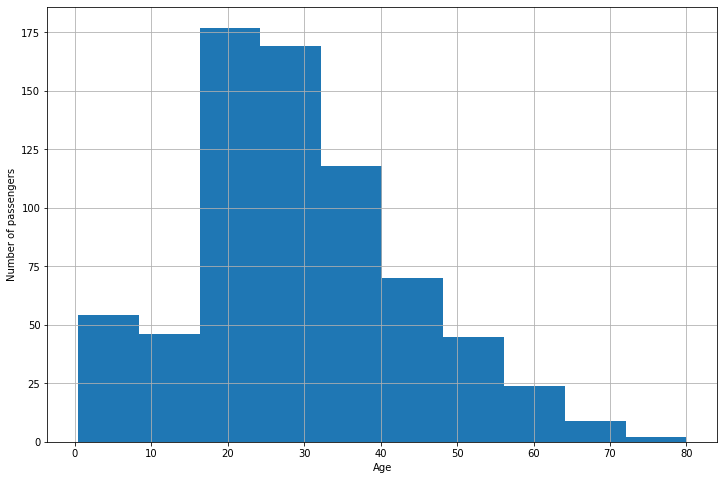

In [ ]:
# plotar a distribuição de idade para descobrir se eles são gaussianos ou enviesados.

plt.figure(figsize=(12,8))
fig = data2.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

- Podemos ver que a distribuição de `idade` está distorcida. Portanto, usaremos a imputação mediana.

In [11]:
# conjunto de dados separado em conjunto de treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, df2.Survived, test_size=0.3, 
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [12]:
# calculate median of Age
median = X_train.Age.median()
median

29.0

In [13]:
# impute missing values in age in train and test set

for df in [X_train, X_test]:
    df['Age'].fillna(median, inplace=True)

### **Verifique se há valores ausentes na variável `age`**

In [14]:
X_train['Age'].isnull().sum()

0

In [15]:
X_test['Age'].isnull().sum()

0

\- Podemos ver que não há valores ausentes na variável `age` no conjunto de treinamento e teste.

- Podemos seguir na mesma linha e preencher os valores ausentes em `Cabine` e` Embarked` com o valor mais frequente.

- **Imputação média / mediana / moda** é o método mais comum para imputar valores ausentes.

## **3.3 Imputação de amostra aleatória** <a class="anchor" id="3.3"> </a>


- A imputação de amostra aleatória refere-se à seleção aleatória de valores da variável para substituir os dados perdidos. Essa técnica preserva a distribuição de variáveis ​​e é adequada para dados ausentes aleatoriamente. Mas, precisamos levar em conta a aleatoriedade, definindo adequadamente uma semente. Caso contrário, a mesma observação ausente poderia ser substituída por valores diferentes em execuções de código diferentes e, portanto, levar a previsões de um modelo diferente. Isso não é desejável ao usar nossos modelos dentro de uma organização.

- A substituição de NA por amostragem aleatória para variáveis ​​categóricas é exatamente o mesmo que para variáveis ​​numéricas.

- A amostragem aleatória consiste em fazer uma observação aleatória do pool de observações disponíveis da variável, ou seja, do pool de categorias disponíveis, e usar esse valor extraído aleatoriamente para preencher o NA. Na amostragem aleatória, toma-se tantas observações aleatórias quanto os valores ausentes estiverem presentes na variável.

- Por observações de amostragem aleatória das categorias presentes, garantimos que a frequência das diferentes categorias / rótulos dentro da variável é preservada.

### Premissas

- **A imputação de amostra aleatória pressupõe que os dados estão ausentes completamente ao acaso (MCAR)**. Nesse caso, faz sentido substituir os valores perdidos por valores extraídos da distribuição da variável /** frequência da categoria original.**
 

## **Random Sample imputation no dataset do Titânic**

In [16]:
# make a copy of titanic dataset

df3 = titanic.copy()

In [17]:
# check the percentage of NA values

df3.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### **Nota importante**

**A imputação deve ser feita no conjunto de treinamento e, em seguida, propagada para o conjunto de teste.** Isso significa que a amostra aleatória a ser usada para preencher os valores ausentes tanto no trem quanto no conjunto de teste deve ser extraída do conjunto de trem.

In [18]:
# conjunto de dados separado em conjunto de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(df3, df3.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [41]:
# escreva uma função para criar 3 variáveis ​​de Idade:

def impute_na(df, variable, median):
    
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0)
     
    # amostragem aleatória
    df[variable+'_random'] = df[variable]
    
    # extraia a amostra aleatória para preencher o na
    random_sample = X_train[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas precisa ter o mesmo índice para mesclar conjuntos de dados
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    # preencher com amostra aleatória
    df[variable+'_random_sample'] = df[variable].fillna(random_sample, inplace=True)

In [42]:
impute_na(X_train, 'Age', median)

In [43]:
impute_na(X_test, 'Age', median)

In [44]:
# check the percentage of NA values

X_train['Age'].isnull().sum()

0

## **3.4 Substituição por valor arbitrário** <a class="anchor" id="3.4"> </a>



- A substituição por um valor arbitrário, como seus nomes indicam, refere-se à substituição de dados ausentes por qualquer valor determinado arbitrariamente, mas o mesmo valor para todos os dados ausentes. **A substituição por um valor arbitrário é adequada se os dados não estiverem ausentes ao acaso ou se houver uma grande proporção de valores ausentes**. **Se todos os valores forem positivos, uma substituição típica é -1**. Como alternativa, substituir por 999 ou -999 são práticas comuns. Precisamos antecipar que esses valores arbitrários não são uma ocorrência comum na variável. A substituição por valores arbitrários, entretanto, **pode não ser adequada para modelos lineares**, pois provavelmente distorcerá a distribuição das variáveis ​​e, portanto, as premissas do modelo podem não ser atendidas.

 
- Para variáveis ​​categóricas, isso equivale a substituir as observações ausentes pelo rótulo “Perdidas”, que é um procedimento amplamente adotado.

- Substituir o NA por valores artitrários deve ser usado quando houver razões para acreditar que o NA não está faltando ao acaso. Em situações como essa, não gostaríamos de substituir pela mediana ou pela média e, portanto, fazer com que NA se parecesse com a maioria de nossas observações.

- Em vez disso, queremos sinalizá-los. Queremos capturar a falta de alguma forma.

## **Replacement by Arbitrary Value on Titanic dataset**

In [28]:
# make a copy of titanic dataset

data4 = titanic.copy()

In [24]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data4, data4.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [38]:
def impute_na(df, variable):
    df[variable+'_zero'] = df[variable].fillna(0, inplace=True)
    df[variable+'_hundred']= df[variable].fillna(100, inplace=True)

In [39]:
# replace NA with the median value in the training and test set
impute_na(X_train, 'Age')
impute_na(X_test, 'Age')

In [40]:
X_train['Age'].isnull().sum()

0

- O valor arbitrário deve ser determinado para cada variável especificamente. Por exemplo, para este conjunto de dados, a escolha de substituir NA na idade por 0 ou 100 é válida, porque nenhum desses valores é frequente na distribuição original da variável e eles estão na cauda da distribuição.

- No entanto, se substituirmos NA na tarifa, esses valores não serão mais válidos, porque podemos ver que a tarifa pode assumir valores de até 500. Portanto, podemos considerar o uso de 500 ou 1000 para substituir NA em vez de 100.

- Podemos ver que isso é totalmente arbitrário. Mas, é usado na indústria. Os valores típicos escolhidos pelas empresas são -9999 ou 9999 ou semelhante.

## **3.5 Imputação de fim de distribuição** <a class="anchor" id="3.5"> </a>



- Fim da imputação da cauda envolve a substituição dos valores perdidos por um valor na extremidade da cauda da distribuição da variável. Essa técnica é semelhante em essência à imputação por um valor arbitrário. No entanto, ao colocar o valor no final da distribuição, não precisamos olhar para cada distribuição de variável individualmente, pois o algoritmo faz isso automaticamente para nós. **Essa técnica de imputação tende a funcionar bem com algoritmos baseados em árvore, mas pode afetar o desempenho dos modelos lineares, pois distorce a distribuição das variáveis.**

- Às vezes, temos motivos para suspeitar que os valores ausentes não estão ausentes ao acaso. E se o valor estiver faltando, deve haver uma razão para isso. Portanto, gostaríamos de capturar essas informações.

- Adicionar uma variável adicional indicando falta pode ajudar nesta tarefa. No entanto, os valores ainda estão ausentes na variável original e precisam ser substituídos se planejarmos usar a variável no aprendizado de máquina.

- Então, vamos substituir o NA, por valores que estão na extremidade da distribuição da variável.

- **O raciocínio é que, se o valor estiver ausente, deve ser por uma razão, portanto, não gostaríamos de substituir os valores ausentes pela média e fazer essa observação parecer a maioria de nossas observações**. Em vez disso, queremos sinalizar essa observação como diferente e, portanto, atribuímos um valor que está na cauda da distribuição, onde as observações raramente são representadas na população.


## **Fim da imputação de distribuição no conjunto de dados do Titanic**

In [29]:
# make a copy of titanic dataset

data5 = titanic.copy()

In [30]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data5, data5.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

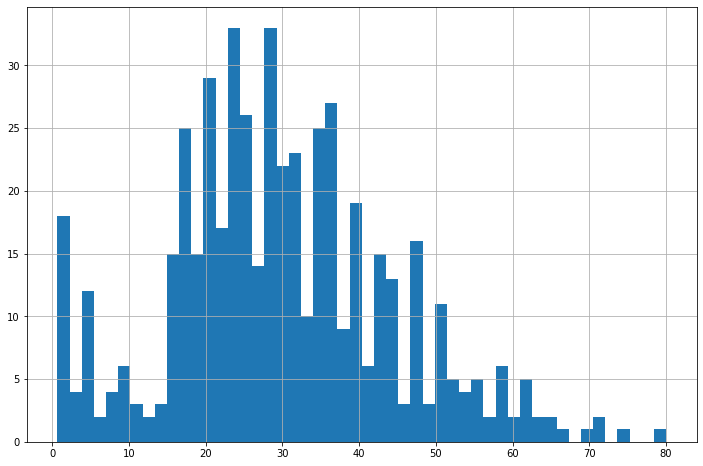

In [31]:
plt.figure(figsize=(12,8))
X_train.Age.hist(bins=50)

In [32]:
# at far end of the distribution
X_train.Age.mean()+3*X_train.Age.std()

73.43632005918366

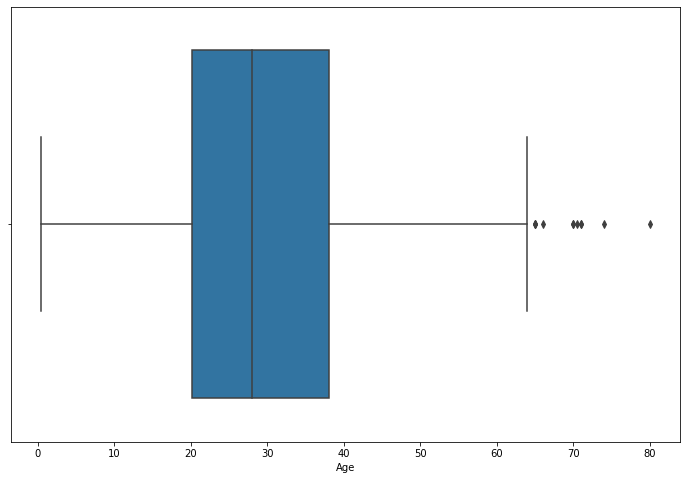

In [33]:
# we can see that there are a few outliers for Age
# according to its distribution, these outliers will be masked when we replace NA by values at the far end 

plt.figure(figsize=(12,8))
sns.boxplot('Age', data=data5)

In [34]:
def impute_na(df, variable, median, extreme):
    df[variable+'_far_end'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [35]:
# let's replace the NA with the median value in the training and testing sets
impute_na(X_train, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())
impute_na(X_test, 'Age', X_train.Age.median(), X_train.Age.mean()+3*X_train.Age.std())

In [36]:
X_train['Age'].isnull().sum()

0

## **3.6 Indicador de valor ausente** <a class="anchor" id="3.6"></a>



- A técnica do indicador ausente envolve a adição de uma variável binária para indicar se o valor está ausente para uma determinada observação. Esta variável assume o valor 1 se a observação estiver faltando, ou 0 caso contrário. Uma coisa a notar é que ainda precisamos substituir os valores ausentes na variável original, o que tendemos a fazer com imputação de média ou mediana. Ao usar essas 2 técnicas juntas, se o valor ausente tiver poder preditivo, ele será capturado pelo indicador ausente e, se não tiver, será mascarado pela imputação de média / mediana.

- Essas 2 técnicas combinadas tendem a funcionar bem com modelos lineares. No entanto, adicionar um indicador ausente expande o espaço de recursos e, como várias variáveis ​​tendem a ter valores ausentes para as mesmas observações, muitas dessas variáveis ​​binárias recém-criadas podem ser idênticas ou altamente correlacionadas.

## **Missing Value Indicator no dataset do Titanic**

In [46]:
# make a copy of titanic dataset

data6 = titanic.copy()

In [47]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data6, data6.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 12), (268, 12))

In [48]:
# create variable indicating missingness

X_train['Age_NA'] = np.where(X_train['Age'].isnull(), 1, 0)
X_test['Age_NA'] = np.where(X_test['Age'].isnull(), 1, 0)

X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,1


In [49]:
# we can see that mean and median are similar. So I will replace with the median

X_train.Age.mean(), X_train.Age.median()

(29.915338645418327, 29.0)

In [50]:
# let's replace the NA with the median value in the training set
X_train['Age'].fillna(X_train.Age.median(), inplace=True)
X_test['Age'].fillna(X_train.Age.median(), inplace=True)

X_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29.0,1,0,2689,14.4583,NaN,C,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,0


- Podemos ver que outra variável `Age_NA` é criada para capturar a falta.

## **Conclusão - Quando usar cada método de imputação**


- Se os valores ausentes forem **inferiores a 5%** da variável, opte pela imputação de **média / mediana ou substituição aleatória da amostra**. Imputa pela categoria **mais frequente** se os valores ausentes forem **mais do que 5% da variável**. Efetue a **imputação de média / mediana + adição** de uma **variável binária** adicional para capturar a falta, adicione um rótulo 'ausente' nas variáveis ​​categóricas.

- Se o **número de NA** em uma variável for **pequeno**, é improvável que tenham um forte impacto na variável / alvo que você está tentando prever. Portanto, tratá-los de maneira especial certamente adicionará ruído às variáveis. Portanto, é mais útil substituir por média / amostra aleatória para preservar a distribuição das variáveis.

- Se a variável / alvo que você está tentando prever for altamente desequilibrada, então pode ser que este pequeno número de NA seja realmente informativo.

#### Exceções

- Se suspeitarmos que NAs não estão faltando aleatoriamente e não quisermos atribuir a ocorrência mais comum a NA, e se não quisermos aumentar o espaço de recursos adicionando uma variável adicional para indicar falta - nesses casos, substitua por um valor na extremidade da distribuição ou um valor arbitrário.

# **4. Codificação categórica - Categorical Encoding** <a class="anchor" id="4"> </a>



- Dados categóricos são dados que usam apenas um número limitado de valores.

- Por exemplo, se você respondeu a uma pesquisa sobre qual marca de carro eles possuem, o resultado seria categórico (porque as respostas seriam coisas como Honda, Toyota, Ford, Nenhum, etc.). As respostas se enquadram em um conjunto fixo de categorias.

- Você obterá um erro se tentar conectar essas variáveis ​​na maioria dos modelos de aprendizado de máquina em Python sem "codificá-los" primeiro. Aqui, mostraremos o método mais popular para codificar variáveis ​​categóricas.


- Codificação de variável categórica é um termo amplo para técnicas coletivas usadas para transformar strings ou rótulos de variáveis ​​categóricas em números. Existem várias técnicas sob este método:

  1. One-Hot encoding (OHE) - Codificação One-Hot (OHE)
  
  2. Ordinal encoding - Codificação ordinal

  3. Count and Frequency encoding - Codificação de contagem e frequência

  4. Target encoding / Mean encoding -  Codificação alvo / codificação média 

  5. Weight of Evidence - Peso da Prova

  6. Rare label encoding - Codificação de rótulo raro

## **4.1 One-Hot Encoding (OHE)** <a class="anchor" id="4.1"></a>

 
- OHE é a abordagem padrão para codificar dados categóricos.

- Uma codificação quente (OHE) cria uma variável binária para cada uma das diferentes categorias presentes em uma variável.

Essas variáveis ​​binárias recebem 1 se a observação mostrar uma determinada categoria ou 0 caso contrário. OHE é adequado para **modelos lineares**. Porém, o OHE expande o espaço de recursos de maneira bastante dramática se as variáveis ​​categóricas forem altamente cardinais ou se houver muitas variáveis ​​categóricas. Além disso, **muitas das variáveis ​​dummy derivadas podem ser altamente correlacionadas.**

- OHE, consiste em substituir a variável categórica por diferentes variáveis ​​booleanas, que assumem valor 0 ou 1, para indicar se uma determinada categoria / rótulo da variável estava presente para aquela observação. Cada uma das variáveis ​​booleanas também são conhecidas como variáveis **​​dummy ou variáveis ​​binárias.**

- Por exemplo, a partir da variável categórica "Gender", com os rótulos 'female' e 'male', podemos gerar a variável booleana "female", que recebe 1 se a pessoa for do sexo feminino ou 0 caso contrário. Também podemos gerar a variável male, que recebe 1 se a pessoa for "masculina" e 0 caso contrário.

In [51]:
# make a copy of titanic dataset

data7 = titanic.copy()

In [52]:
data7['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [53]:
# one hot encoding

pd.get_dummies(data7['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [54]:
# for better visualisation
pd.concat([data7['Sex'], pd.get_dummies(data7['Sex'])], axis=1).head()

,Sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


- Podemos ver que precisamos apenas de 1 das 2 variáveis ​​dummy para representar a variável categórica original `Sexo`. Qualquer um dos 2 fará o trabalho, e não importa qual deles selecionarmos, pois eles são equivalentes. Portanto, para codificar uma variável categórica com 2 rótulos, precisamos apenas de 1 variável fictícia.

- Para estender este conceito, para codificar variáveis ​​categóricas com rótulos k, precisamos de k-1 variáveis ​​fictícias. Podemos realizar essa tarefa da seguinte maneira:

In [55]:
# obtaining k-1 labels
pd.get_dummies(data7['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [56]:
# Let's now look at an example with more than 2 labels

data7['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [57]:
# check the number of different labels
data7.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [58]:
# get whole set of dummy variables

pd.get_dummies(data7['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [59]:
# get k-1 dummy variables

pd.get_dummies(data7['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


- A API Scikt-Learn fornece uma classe para [codificação one-hot] (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

- Além disso, apresentarei a você uma ampla gama de opções de codificação do [pacote Category Encoders] (https://contrib.scikit-learn.org/categorical-encoding/) para uso com scikit-learn em Python.

- Ambas as opções acima também podem ser usadas para One-Hot Encoding.

## **Nota importante sobre OHE**

- Scikit-learn's [one hot encoder class] (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) aceita apenas valores numéricos categóricos. Portanto, qualquer valor de tipo de string deve ser codificado por rótulo primeiro, antes de um codificado a quente.

- No exemplo titânic, o gênero dos passageiros deve ser codificado por rótulo primeiro, antes de ser codificado um hot usando a classe de codificador one hot do Scikit-learn.

## **4.2 Ordinal encoding** <a class="anchor" id="4.2"></a>



- Variáveis ​​categóricas cujas categorias podem ser ordenadas de forma significativa são chamadas ordinais. Por exemplo:

  - Nota do aluno em um exame (A, B, C ou Reprovado).
  - Os dias da semana podem ser ordinais com segunda-feira = 1 e domingo = 7.
  - Nível educacional, com as categorias: Ensino fundamental, Ensino médio, Graduação universitária, Doutorado classificados de 1 a 4.
   
- Quando a variável categórica é ordinal, a abordagem mais direta é substituir os rótulos por algum número ordinal.

- Na codificação ordinal substituímos as categorias por dígitos, de forma arbitrária ou informada. Se codificarmos categorias arbitrariamente, atribuímos um inteiro por categoria de 1 a n, onde n é o número de categorias únicas. Se, em vez disso, atribuímos os inteiros de maneira informada, observamos a distribuição alvo: ordenamos as categorias de 1 a n, atribuindo 1 à categoria para a qual as observações mostram a maior média de valor alvo, en à categoria com o valor médio alvo mais baixo.

- Podemos usar [Category Encoders Package] (https://contrib.scikit-learn.org/categorical-encoding/) para realizar a codificação ordinal. Consulte a documentação para obter mais informações.


## **4.3 Count and Frequency Encoding** <a class="anchor" id="4.3"></a>



- Na codificação de contagem, substituímos as categorias pela contagem das observações que mostram essa categoria no conjunto de dados. Da mesma forma, podemos substituir a categoria **pela frequência -ou porcentagem-** de observações no conjunto de dados. Ou seja, se 10 de nossas 100 observações mostrassem a cor azul, substituiríamos o azul por 10 se fizermos a codificação de contagem ou por 0,1 se substituirmos pela frequência. Essas técnicas capturam a representação de cada rótulo em um conjunto de dados, mas a codificação pode não ser necessariamente preditiva do resultado.

- Essa abordagem é muito utilizada em competições Kaggle, onde substituímos cada rótulo da variável categórica pela contagem, que é a quantidade de vezes que cada rótulo aparece no conjunto de dados. Ou a frequência, esta é a porcentagem de observações dentro dessa categoria. Os dois métodos são equivalentes.

In [73]:
#import dataset
df_train = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Mercedes_Benz_test.csv')
                       

df_test = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Mercedes_Benz_train.csv') 
                      

In [74]:
df_train.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,

In [76]:
# let's have a look at how many labels

for col in df_train.columns[2:9]:
    print(col, ': ', len(df_train[col].unique()), ' labels')

X1 :  27  labels
X2 :  45  labels
X3 :  7  labels
X4 :  4  labels
X5 :  32  labels
X6 :  12  labels
X8 :  25  labels


Ao fazer a transformação de contagem de variáveis ​​categóricas, é importante calcular a contagem (ou frequência = contagem / total de observações) no conjunto de treinamento e, em seguida, usar esses números para substituir os rótulos no conjunto de teste.

In [77]:
df_train = df_train [['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train.X8, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 7), (1263, 7))

In [79]:
# vamos obter as contagens para cada um dos rótulos na variável X2
# vamos capturar isso em um dicionário que podemos usar para mapear novamente os rótulos

X_train.X2.value_counts().to_dict()

{'a': 31,
 'ab': 1,
 'ac': 16,
 'ad': 4,
 'ae': 338,
 'af': 4,
 'ag': 15,
 'ah': 2,
 'ai': 321,
 'ak': 180,
 'al': 2,
 'am': 2,
 'an': 1,
 'ao': 19,
 'ap': 7,
 'aq': 51,
 'as': 1155,
 'au': 3,
 'aw': 6,
 'ax': 1,
 'ay': 58,
 'b': 28,
 'd': 5,
 'e': 52,
 'f': 59,
 'g': 4,
 'h': 3,
 'i': 12,
 'j': 1,
 'k': 14,
 'm': 245,
 'n': 80,
 'p': 5,
 'q': 3,
 'r': 113,
 's': 69,
 't': 20,
 'u': 1,
 'w': 3,
 'x': 2,
 'z': 10}

In [80]:
# vamos olhar para o X_train para que possamos comparar a recodificação da variável

X_train.head()

,X1,X2,X3,X4,X5,X6,X8
3059,r,as,f,d,q,g,w
3014,s,as,c,d,q,g,i
3368,s,as,g,d,s,l,i
2772,aa,ai,c,d,p,g,r
3383,aa,ai,g,d,s,a,v


In [81]:
# agora vamos substituir cada rótulo em X2 por sua contagem


# primeiro fazemos um dicionário que mapeia cada rótulo para as contagens
X_frequency_map = X_train.X2.value_counts().to_dict()

# e agora substituímos os rótulos X2 no trem e no conjunto de teste com o mesmo mapa
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6,X8
3059,r,1155,f,d,q,g,w
3014,s,1155,c,d,q,g,i
3368,s,1155,g,d,s,l,i
2772,aa,321,c,d,p,g,r
3383,aa,321,g,d,s,a,v


Onde no conjunto de dados original, para a observação 1 na variável 2 antes era 'ai', agora foi substituído pela contagem 289. E assim por diante para o resto das categorias.

## **4.4 Target / Mean Encoding - Codificação Alvo/Média** <a class="anchor" id="4.4"></a>

- Uma codificação de nível, também chamada de codificação de mídia, substitui cada categoria por uma variável, o valor médio do nível, por observações que representam uma determinada categoria. Por exemplo, temos uma categoria variável "cidade" e queremos que nosso cliente compre uma TV da qual enviamos um cartão. Se 30% das pessoas na cidade de "Londres" cobrirem a TV, substituiremos Londres por 0,3.


- Esta técnica tem 3 benefícios:

  1. não expande o espaço do recurso,

  2. captura algumas informações sobre o nível de codificação da categoria e

  3. cria uma relação monotônica entre variável e constante.
  

- As relações monotônicas entre a variável e o destino tendem a aumentar ou diminuir linearmente.
 

In [82]:
# let's load again the titanic dataset

data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [83]:
# let's fill NA values with an additional label

data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [84]:
# check number of different labels in Cabin

len(data.Cabin.unique())

148

In [85]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [86]:
# check the labels
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### **Importante**

- O fator de risco deve ser calculado por rótulo considerando apenas o conjunto de treinamento e, em seguida, expandido para o conjunto de teste.

In [87]:

# Vamos separar em conjunto de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']], data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [88]:

# vamos calcular a frequência alvo para cada rótulo

X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [89]:

# e agora vamos fazer o mesmo mas capturando o resultado em um dicionário

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ordered_labels

{'A': 0.42857142857142855,
 'B': 0.7741935483870968,
 'C': 0.5714285714285714,
 'D': 0.6923076923076923,
 'E': 0.7407407407407407,
 'F': 0.6666666666666666,
 'G': 0.5,
 'M': 0.3036093418259023,
 'T': 0.0}

In [90]:
# substitua os rótulos pelo 'risco' (frequência alvo)
# observe que calculamos as frequências com base apenas no conjunto de treinamento

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [91]:
# view results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


Text(0, 0.5, 'Survived')

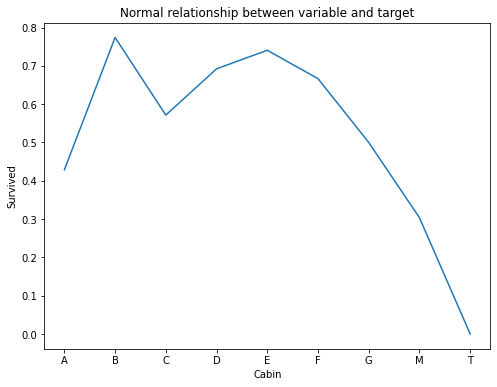

In [92]:
# plota a variável original

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

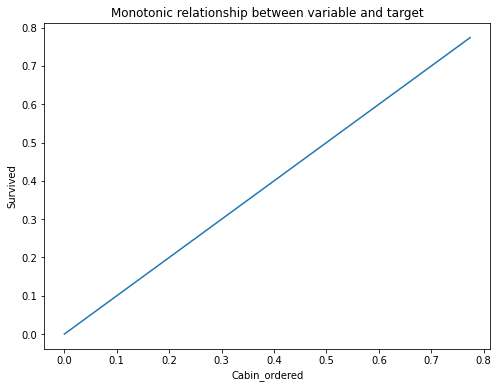

In [93]:
# plot the transformed result: the monotonic variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

## **4.5  Weight of evidence - Peso da evidência** <a class="anchor" id="4.5"></a>


- Peso de evidência (WOE) é uma técnica utilizada para codificar variáveis ​​categóricas para classificação. WOE é o logaritmo natural da probabilidade do alvo ser 1 dividido pela probabilidade do alvo ser 0. WOE tem a propriedade de que seu valor será 0 se o fenômeno for aleatório; será maior que 0 se a probabilidade do alvo ser 0 for maior, e será menor que 0 quando a probabilidade do alvo ser 1 for maior.

- A transformação WOE cria uma bela representação visual da variável, pois olhando para a variável codificada WOE, podemos ver, categoria por categoria, se ela favorece o resultado de 0 ou de 1. Além disso, WOE cria uma relação monotônica entre variável e destino, e deixa todas as variáveis ​​dentro do mesmo intervalo de valores.

In [94]:
# preview X_train

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,0.740741
52,D,1,0.692308
386,M,0,0.303609
124,D,0,0.692308
578,M,0,0.303609


In [95]:
# now we calculate the probability of target=1 
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [96]:
# let's make a dataframe with the above calculation

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [97]:
# e agora a probabilidade de alvo = 0
# e adicionamos ao dataframe

prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [98]:
# já que o log de zero não está definido, vamos definir esse número para algo pequeno e diferente de zero

prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000010,1.000000


In [100]:
# now we calculate the WoE

prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,WoE
Cabin,,,
A,0.428571,0.571429,-0.287682
B,0.774194,0.225806,1.232144
C,0.571429,0.428571,0.287682
D,0.692308,0.307692,0.810930
E,0.740741,0.259259,1.049822
F,0.666667,0.333333,0.693147
G,0.500000,0.500000,0.000000
M,0.303609,0.696391,-0.830169
T,0.000010,1.000000,-11.512925


In [101]:
# and we create a dictionary to re-map the variable

prob_df['WoE'].to_dict()

{'A': -0.2876820724517809,
 'B': 1.232143681292632,
 'C': 0.28768207245178085,
 'D': 0.8109302162163288,
 'E': 1.0498221244986774,
 'F': 0.6931471805599452,
 'G': 0.0,
 'M': -0.8301689781242366,
 'T': -11.512925464970229}

In [102]:
# and we make a dictionary to map the orignal variable to the WoE
# same as above but we capture the dictionary in a variable

ordered_labels = prob_df['WoE'].to_dict()

In [103]:
# replace the labels with the WoE

X_train['Cabin_ordered'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordered_labels)

In [104]:
# check the results

X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,1.049822
52,D,1,0.810930
386,M,0,-0.830169
124,D,0,0.810930
578,M,0,-0.830169


Text(0, 0.5, 'Survived')

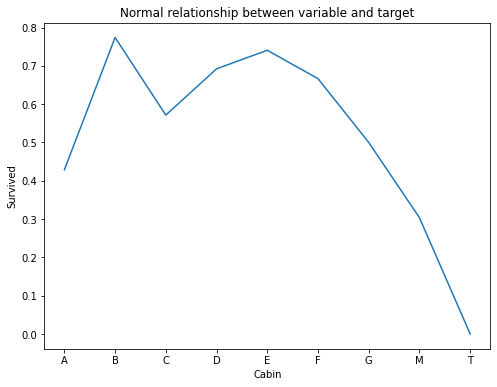

In [105]:
# plot the original variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

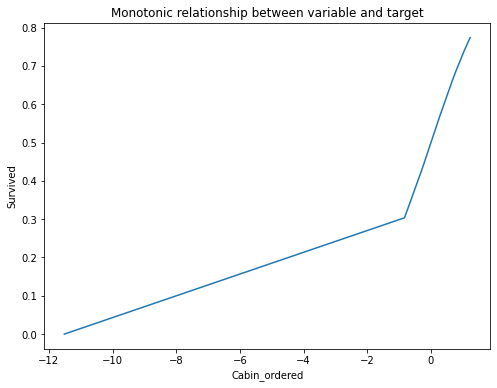

In [106]:
# plot the transformed result: the monotonic variable

fig = plt.figure(figsize=(8,6))
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')


Podemos ver no gráfico acima, agora existe uma relação monotônica entre a variável Cabine e a probabilidade de sobrevivência. Quanto maior o número da cabine, maior a probabilidade de a pessoa sobreviver.

# **5. Variable Transformation - Transformação de variável** <a class="anchor" id="5"></a>


- Alguns modelos de aprendizado de máquina, como regressão linear e logística, assumem que as variáveis ​​são normalmente distribuídas. Outros se beneficiam de distribuições **tipo Gaussiano**, pois nessas distribuições as observações de X disponíveis para prever Y variam em uma faixa maior de valores. Assim, variáveis ​​distribuídas gaussianas podem aumentar o desempenho do algoritmo de aprendizado de máquina.

- Se uma variável não for normalmente distribuída, às vezes é possível encontrar uma transformação matemática para que a variável transformada seja gaussiana. As transformações matemáticas normalmente usadas são:

 
  1. Transformação logarítmica - log(x)

  2. Transformação recíproca - 1 / x

  3. Transformação de raiz quadrada - sqrt(x)

  4. Transformação exponencial - exp(x)

  5. Transformação Box-Cox 
  
- Agora, vamos demonstrar as transformações acima no conjunto de dados do Titanic.

In [107]:
# load the numerical variables of the Titanic Dataset

data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500



### **Preencha os dados ausentes com amostra aleatória**

In [108]:
# primeiro vou preencher os dados faltantes da variável idade, com uma amostra aleatória da variável

def impute_na(data, variable):
    
    #função para preencher na com uma amostra aleatória
    df = data.copy()
    
    # amostragem aleatória
    df[variable+'_random'] = df[variable]
    
  
    # extrai a amostra aleatória para preencher o na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas precisa ter o mesmo índice para mesclar conjuntos de dados
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [109]:
# fill na
data['Age'] = impute_na(data, 'Age')

In [111]:
data['Age'].isnull().mean()

0.0

## **Age**

### **Distribuição original**


- Podemos visualizar a distribuição da variável `Idade`, traçando um histograma e o gráfico Q-Q.

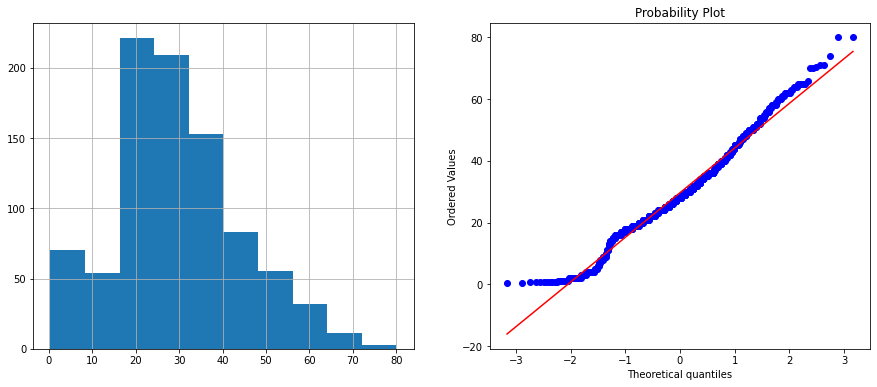

In [112]:
# plota os histogramas para dar uma olhada rápida nas distribuições
# podemos plotar gráficos Q-Q para visualizar se a variável é normalmente distribuída

def diagnostic_plots(df, variable):
# função para plotar um histograma e um plot Q-Q
    # lado a lado, para uma determinada variável
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(data, 'Age')


- A variável 'idade' é quase normalmente distribuída, exceto por algumas observações na cauda de valor mais baixo da distribuição. Observe a ligeira inclinação para a esquerda no histograma e o desvio da linha reta em direção aos valores mais baixos no gráfico Q-Q-.

- Nas células a seguir, aplicarei as transformações mencionadas acima e compararei as distribuições da variável `Age` transformada.

## **5.1 Transformação logarítmica** <a class="anchor" id="5.1"></a>



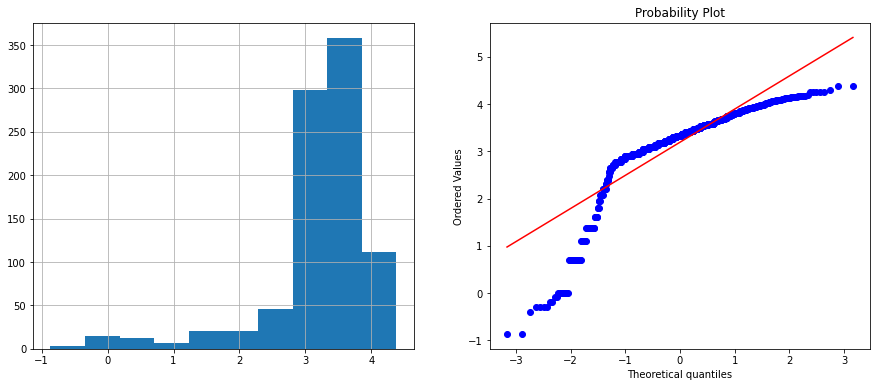

In [113]:
### Logarithmic transformation
data['Age_log'] = np.log(data.Age)

diagnostic_plots(data, 'Age_log')

- A transformação logarítmica, não produziu uma distribuição do tipo Gaussiana para Idade.


## **5.2 Reciprocal transformation -Transformação recíproca** <a class="anchor" id="5.2"></a>

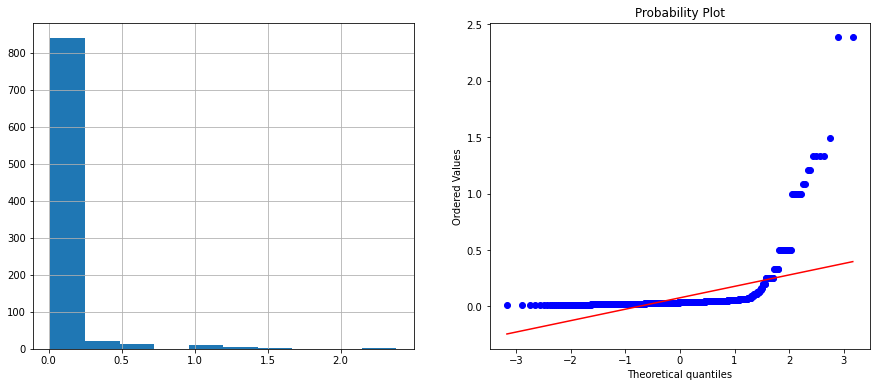

In [114]:
### Reciprocal transformation
data['Age_reciprocal'] = 1 / data.Age

diagnostic_plots(data, 'Age_reciprocal')

- A transformação recíproca também não foi útil para transformar Idade em uma variável normalmente distribuída.

## **5.3  Square root transformation - Transformação de raiz quadrada** <a class="anchor" id="5.3"></a>


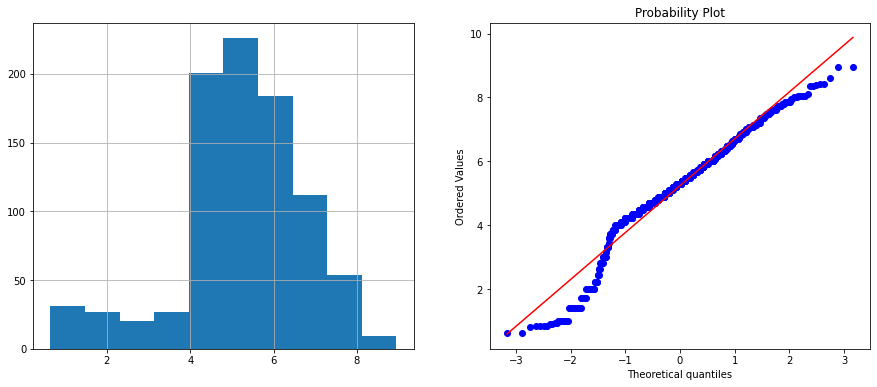

In [ ]:
data['Age_sqr'] =data.Age**(1/2)

diagnostic_plots(data, 'Age_sqr')

A transformação de raiz quadrada é um pouco mais bem sucedida que as duas transformações anteriores. No entanto, a variável ainda não é gaussiana, e isso não representa uma melhora em direção à normalidade em relação à distribuição original de Idade.

## **5.4 Exponential Transformation - Transformação exponencial** <a class="anchor" id="5.4"></a>


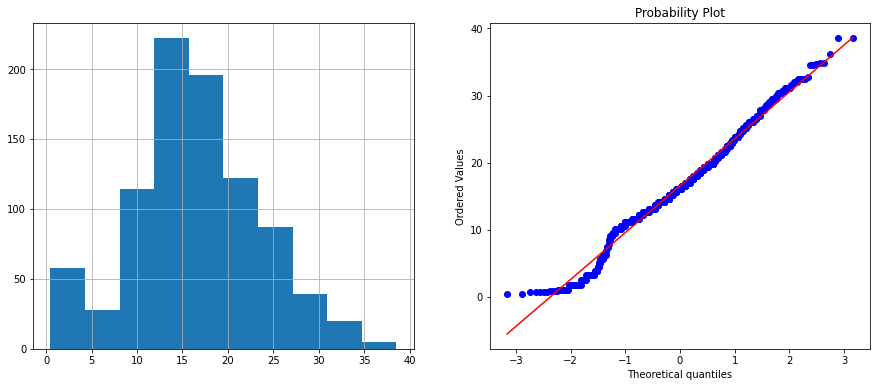

In [115]:
data['Age_exp'] = data.Age**(1/1.2) 

diagnostic_plots(data, 'Age_exp')

A transformação exponencial é a melhor de todas as transformações acima, no momento de gerar uma variável normalmente distribuída. Comparando o histograma e o gráfico Q-Q da Age exponencialmente transformada com a distribuição original, podemos dizer que a variável transformada segue mais de perto uma distribuição gaussiana.

## **5.5 BoxCox transformation - Transformação BoxCox** <a class="anchor" id="5.5"></a>

- A transformação Box-Cox é definida como:

     T(Y)=(Y exp(λ)−1)/λ

- onde Y é a variável de resposta e λ é o parâmetro de transformação. λ varia de -5 a 5. Na transformação, todos os valores de λ são considerados e o valor ótimo para uma determinada variável é selecionado.

- Resumidamente, para cada λ (a transformação testa vários λs), é calculado o coeficiente de correlação do Gráfico de Probabilidade (gráfico Q-Q abaixo, correlação entre valores ordenados e quantis teóricos).

- O valor de λ correspondente à correlação máxima no gráfico é então a escolha ótima para λ.

- Em python, podemos avaliar e obter o melhor λ com a função stats.boxcox do pacote scipy.

- Podemos proceder da seguinte forma -

Optimal λ:  0.7648522500282625


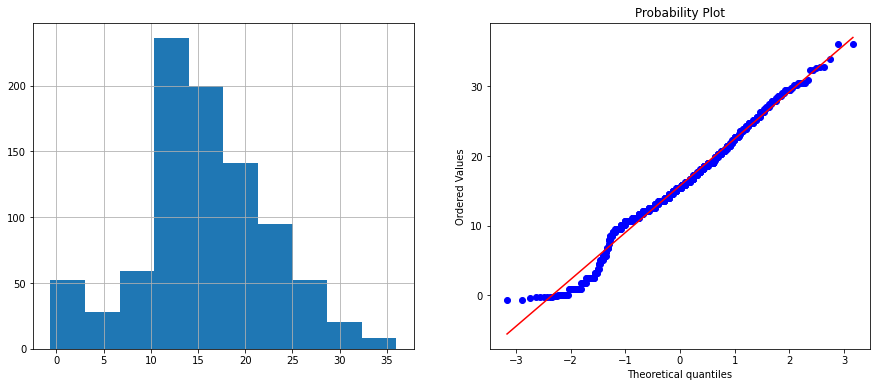

In [116]:
data['Age_boxcox'], param = stats.boxcox(data.Age) 

print('Optimal λ: ', param)

diagnostic_plots(data, 'Age_boxcox')

A transformação Box Cox foi tão boa quanto a transformação exponencial que realizamos acima para fazer Age parecer mais gaussiana. Se decidirmos prosseguir com a variável original ou com a variável transformada, dependerá do objetivo do exercício.

# **6. Discretization - Discretização** <a class="anchor" id="6"></a>


- **Discretização** é o processo de transformar variáveis ​​contínuas em variáveis ​​discretas criando um conjunto de intervalos contíguos que abrangem o intervalo de valores da variável.

### A discretização ajuda a lidar com valores discrepantes e variáveis ​​altamente distorcidas

- **Discretização** ajuda a lidar com valores discrepantes colocando esses valores nos intervalos mais baixos ou mais altos junto com os valores internos restantes da distribuição. Assim, essas observações atípicas não diferem mais do restante dos valores nas caudas da distribuição, pois agora estão todas juntas no mesmo intervalo / bucket. Além disso, ao criar compartimentos ou intervalos apropriados, a discretização pode ajudar a espalhar os valores de uma variável assimétrica em um conjunto de compartimentos com igual número de observações.

- Existem várias abordagens para transformar variáveis ​​contínuas em discretas. Esse processo também é conhecido como **binning**, com cada bin sendo cada intervalo.

- **Discretização** refere-se à ordenação dos valores da variável em bins ou intervalos, também chamados de buckets. Existem várias maneiras de discretizar variáveis:
 

  1. Discretização de largura igual

  2. Discretização de igual frequência
  
  3. Discretização do conhecimento de domínio

  4. Discretização usando árvores de decisão

## **Discricionando dados com as funções pandas cut e qcut**

- Ao lidar com dados numéricos contínuos, geralmente é útil agrupar os dados em vários buckets para análise posterior. O Pandas oferece suporte a essas abordagens usando as funções **cut** e **qcut**.

- O comando **cut** cria compartimentos equidistantes, mas a frequência das amostras é desigual em cada compartimento.

- O comando **qcut** cria compartimentos de tamanhos desiguais, mas a frequência das amostras é igual em cada compartimento.

- O diagrama a seguir ilustra o ponto: -

![Discretising data with pandas cut and qcut](https://i.stack.imgur.com/pObHa.png)

## **6.1 Discretização de largura igual com função de corte de pandas** <a class="anchor" id="6.1"></a>

[Índice](#0.1)


- Binning de largura igual divide o escopo de valores possíveis em N bins de mesma largura. A largura é determinada pelo intervalo de valores na variável e o número de bins que desejamos usar para dividir a variável.

  largura = (valor máximo - valor mínimo) / N

- Por exemplo se os valores da variável variam entre 0 e 100, criamos 5 bins assim: largura = (100-0) / 5 = 20. Os bins são assim 0-20, 20-40, 40-60, 80-100. O primeiro e último compartimentos (0-20 e 80-100) podem ser expandidos para acomodar valores discrepantes (ou seja, valores abaixo de 0 ou maiores que 100 também seriam colocados nesses compartimentos).

- Não há regra prática para definir N. Normalmente, não queremos mais de 10.

- Fonte: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

In [117]:
# define x
x = np.array([24,  7,  2, 25, 22, 29])
x    

array([24,  7,  2, 25, 22, 29])

In [118]:
# equal width discretisation with cut 
pd.cut(x, bins = 3, labels = ["bad", "medium", "good"]).value_counts() #Bins size has equal interval of 9   

bad       2
medium    0
good      4
dtype: int64

## **6.2 Discretização de frequência igual com a função pandas qcut** <a class="anchor" id="6.2"></a>

[Índice](#0.1)

- Binning de igual frequência divide o escopo de valores possíveis da variável em N bins, onde cada bin carrega a mesma quantidade de observações. Isso é particularmente útil para variáveis ​​assimétricas, pois espalha as observações pelos diferentes compartimentos igualmente. Normalmente, encontramos os limites do intervalo determinando os quantis.

- A discretização de igual frequência usando quantis consiste em dividir a variável contínua em N quantis, N a serem definidos pelo usuário. Não há regra prática para definir N. No entanto, se pensarmos na variável discreta como uma variável categórica, onde cada bin é uma categoria, gostaríamos de manter N (o número de categorias) baixo (normalmente não mais que 10 ).

- Fonte: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.qcut.html

In [119]:
# define x
x = np.array([24,  7,  2, 25, 22, 29])
x    

array([24,  7,  2, 25, 22, 29])

In [120]:
# equal frequency discretisation with qcut 
pd.qcut(x, q = 3, labels = ["bad", "medium", "good"]).value_counts() #Equal frequency of 2 in each bins

bad       2
medium    2
good      2
dtype: int64

## **6.3 Discretização do conhecimento do domínio** <a class="anchor" id="6.3"></a>

- Freqüentemente, ao projetar variáveis ​​em um ambiente de negócios, os especialistas em negócios determinam os intervalos em que eles acham que a variável deve ser dividida para que faça sentido para o negócio. Esses intervalos podem ser definidos arbitrariamente ou seguindo alguns critérios de uso para o negócio. Exemplos típicos são a discretização de variáveis ​​como Idade e Renda.

- A renda, por exemplo, geralmente é limitada a um determinado valor máximo, e todas as rendas acima desse valor caem no último balde. De acordo com a idade, geralmente é dividido em determinados grupos de acordo com a necessidade do negócio, por exemplo, divisão em 0-21 (para menores de idade), 20-30 (para jovens adultos), 30-40, 40-60 e > 60 (para aposentados ou próximos) são frequentes.

In [121]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv', usecols = ['Age', 'Survived'])
data.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


A variável Idade contém dados ausentes, que preencherei extraindo uma amostra aleatória da variável.

In [122]:
def impute_na(data, variable):
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = data[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [123]:
# let's fill the missing data
data['Age'] = impute_na(data, 'Age')

In [124]:
data['Age'].isnull().sum()

0

In [126]:
# vamos dividir a idade nos buckets

# limites do bucket
buckets = [0,20,40,60,100]

# rótulos de balde
labels = ['0-20', '20-40', '40-60', '>60']


#discretização
pd.cut(data.Age, bins = buckets, labels = labels, include_lowest=True).value_counts()

20-40    486
0-20     221
40-60    156
>60       28
Name: Age, dtype: int64

In [127]:
# cria duas novas colunas após a discretização

data['Age_buckets_labels'] = pd.cut(data.Age, bins=buckets, labels = labels, include_lowest=True)
data['Age_buckets'] = pd.cut(data.Age, bins=buckets, include_lowest=True)

data.head()

,Survived,Age,Age_buckets_labels,Age_buckets
0,0,22.0,20-40,"(20.0, 40.0]"
1,1,38.0,20-40,"(20.0, 40.0]"
2,1,26.0,20-40,"(20.0, 40.0]"
3,1,35.0,20-40,"(20.0, 40.0]"
4,0,35.0,20-40,"(20.0, 40.0]"


In [128]:
data.tail()

,Survived,Age,Age_buckets_labels,Age_buckets
886,0,27.0,20-40,"(20.0, 40.0]"
887,1,19.0,0-20,"(-0.001, 20.0]"
888,0,15.0,0-20,"(-0.001, 20.0]"
889,1,26.0,20-40,"(20.0, 40.0]"
890,0,32.0,20-40,"(20.0, 40.0]"


- Podemos observar os baldes em que cada observação da Idade foi colocada. Por exemplo, 27 anos foi colocado no intervalo 20-40.

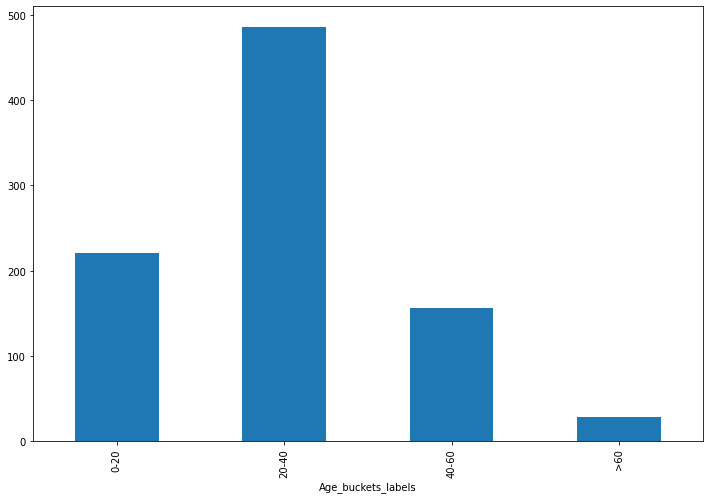

In [129]:
# number of passengers per age bucket

plt.figure(figsize=(12,8))
data.groupby('Age_buckets_labels')['Age'].count().plot.bar()

- Podemos ver que há passageiros diferentes em cada rótulo de faixa etária.

# **7. 7. Outlier Engineering** <a class="anchor" id="7"></a>

[Índice](#0.1)


- Outliers são valores que são excepcionalmente altos ou excepcionalmente baixos em relação ao resto das observações da variável. Existem algumas técnicas para manipulação de outliers:

  1. Remoção de valores discrepantes

  2. Tratamento de valores discrepantes como valores ausentes

  3. Discretização

  4. Codificação superior/inferior/zero


### **Identificando valores discrepantes**

#### **Análise de valor extremo**

- A forma mais básica de detecção de valores discrepantes é a Análise de Valor Extremo de dados unidimensionais. A chave para esse método é determinar as caudas estatísticas da distribuição subjacente da variável e, em seguida, encontrar os valores que ficam bem no final das caudas.

- No cenário típico, a distribuição da variável é gaussiana e, portanto, os outliers ficarão fora da média mais ou menos 3 vezes o desvio padrão da variável.

- Se a variável não for normalmente distribuída, uma abordagem geral é calcular os quantis e, em seguida, o intervalo interquantil (IQR), da seguinte forma:

- IQR = 75º quantil - 25º quantil

- Um outlier ficará fora dos seguintes limites superior e inferior:

- Limite superior = 75º quantil + (IQR * 1,5)

- Limite inferior = 25º quantil - (IQR * 1,5)

ou para casos extremos:

- Limite superior = 75º quantil + (IQR * 3)

- Limite inferior = 25º quantil - (IQR * 3)

## **7.1 Remoção de valores discrepantes** <a class="anchor" id="7.1"></a>


- A remoção de valores atípicos refere-se à remoção de observações atípicas do conjunto de dados. Outliers, por natureza, não são abundantes, portanto, esse procedimento não deve distorcer drasticamente o conjunto de dados. Mas se houver discrepâncias em várias variáveis, podemos acabar removendo uma grande parte do conjunto de dados.

## **7.2 Tratamento de valores discrepantes como valores ausentes** <a class="anchor" id="7.2"></a>

- Podemos tratar outliers como informações ausentes e continuar com qualquer um dos métodos de imputação descritos anteriormente neste kernel.

 


## **7.3 Discretização** <a class="anchor" id="7.3"></a>


- A discretização trata os valores atípicos automaticamente, pois os valores atípicos são classificados nas caixas do terminal, juntamente com as outras observações de maior ou menor valor. As melhores abordagens são igual frequência e discretização baseada em árvore.

## **7.4 Codificação superior/inferior/zero** <a class="anchor" id="7.4"></a>

- A codificação superior ou inferior também é conhecida como **Winsorisation** ou **limitação de valores discrepantes**. O procedimento envolve limitar os valores máximo e mínimo a um valor predefinido. Esse valor predefinido pode ser arbitrário ou pode ser derivado da distribuição variável.

- Se a variável tiver distribuição normal, podemos limitar os valores máximo e mínimo na média mais ou menos 3 vezes o desvio padrão. Se a variável for distorcida, podemos usar a regra de proximidade do intervalo interquantil ou limite nos percentis superior e inferior.

- Isso é demonstrado usando o conjunto de dados titânico abaixo: 

 



In [130]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/Feature_Engineering_Methods_train.csv', usecols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500



### **Codificação principal importante**

A codificação superior e a codificação inferior, como qualquer outra etapa de pré-processamento de recursos, devem ser determinadas sobre o conjunto de treinamento e, em seguida, transferidas para o conjunto de teste. Isso significa que devemos encontrar os limites superior e inferior apenas no conjunto de treinamento e usar essas bandas para limitar os valores no conjunto de teste.

In [131]:
# divide dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

### **Outliers em variáveis ​​contínuas**

- Podemos ver que `Idade` e `Fare` são variáveis ​​contínuas. Então, primeiro vou limitar os valores discrepantes nessas variáveis.

Text(0, 0.5, 'Fare')

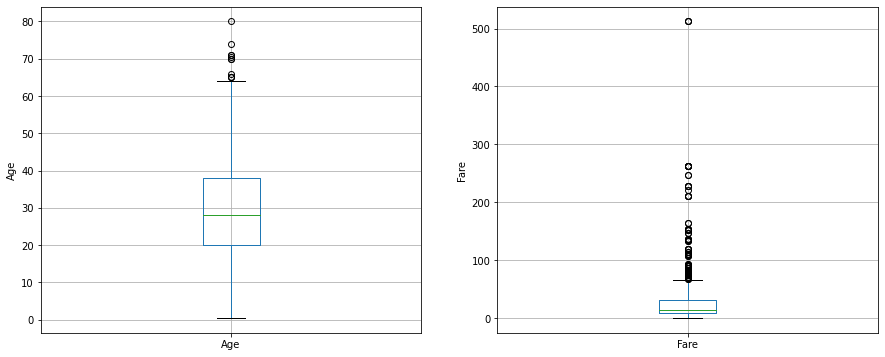

In [132]:
# vamos fazer boxplots para visualizar outliers nas variáveis ​​contínuas
# Idade e Tarifa

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_ylabel('Fare')


- Tanto a idade quanto a tarifa contêm valores discrepantes. Vamos descobrir quais avaliadores são os valores discrepantes.

Text(0.5, 0, 'Fare')

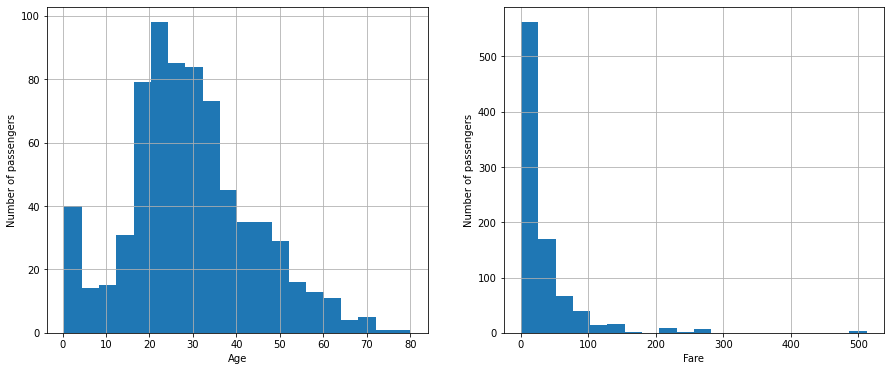

In [133]:

# primeiro traçamos as distribuições para descobrir se elas são gaussianas ou assimétricas.
# Dependendo da distribuição, usaremos a suposição normal ou o interquantil
# intervalo para encontrar outliers

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

plt.subplot(1, 2, 2)
fig = data.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare')

A idade é bastante gaussiana e a tarifa é distorcida, então usarei a suposição gaussiana para a idade e o intervalo interquantil para a tarifa.

In [134]:
# find outliers

# Age
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

# Fare
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -13.88037434994331 or > 73.27860964406095
Fare outliers are values < -61.358399999999996 or > 100.2688


### **Age**

- Para a variável Idade, os outliers estão apenas à direita da distribuição. Portanto, precisamos apenas introduzir o top-coding.

In [135]:
# view the statistical summary of Age
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [136]:
# Assuming normality

Upper_boundary = X_train.Age.mean() + 3* X_train.Age.std()
Upper_boundary

73.43632005918366

In [137]:
# top-coding the Age variable

X_train.loc[X_train.Age>73, 'Age'] = 73
X_test.loc[X_test.Age>73, 'Age'] = 73

X_train.Age.max(), X_test.Age.max()

(73.0, 70.5)

### **Fare**

- Os outliers, de acordo com o gráfico acima, estão todos no lado direito da distribuição. Ou seja, algumas pessoas pagaram preços extremamente altos por seus ingressos. Portanto, nesta variável, apenas valores extremamente altos afetarão o desempenho de nossos modelos de aprendizado de máquina e, portanto, precisamos fazer o top-coding.

In [138]:
# view statistical properties of Fare

X_train.Fare.describe()

count    623.000000
mean      32.458273
std       48.257658
min        0.000000
25%        7.925000
50%       15.000000
75%       31.387500
max      512.329200
Name: Fare, dtype: float64

In [139]:
# top coding: upper boundary for outliers according to interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Upper_fence = X_train.Fare.quantile(0.75) + (IQR * 3)

Upper_fence

100.6563

O limite superior, acima do qual todo valor é considerado um valor atípico, é um custo de 100 dólares para a Tarifa.

In [140]:
# top-coding: capping the variable Fare at 100
X_train.loc[X_train.Fare>100, 'Fare'] = 100
X_test.loc[X_test.Fare>100, 'Fare'] = 100
X_train.Fare.max(), X_test.Fare.max()

(100.0, 100.0)

Assim, lidamos com outliers de uma perspectiva de aprendizado de máquina.

# **8. Engenharia de data e hora** <a class="anchor" id="8"></a>

As variáveis ​​de data são um tipo especial de variável categórica. Por sua própria natureza, as variáveis ​​de data conterão uma infinidade de rótulos diferentes, cada um correspondendo a uma data específica e, às vezes, a uma hora. Variáveis ​​de data, quando pré-processadas corretamente, podem enriquecer muito um conjunto de dados. Por exemplo, de uma variável de data podemos extrair:

- Mês
- Trimestre
- Semestre
- Dia (número)
- Dia da semana
- É fim de semana?
- Hora
- Diferenças de tempo em anos, meses, dias, horas, etc.


É importante entender que as variáveis ​​de data não devem ser usadas como variáveis ​​categóricas que trabalhamos até agora ao construir um modelo de aprendizado de máquina. Não só porque eles têm uma infinidade de categorias, mas também porque quando realmente usarmos o modelo para pontuar uma nova observação, essa observação provavelmente será no futuro e, portanto, seu rótulo de data será diferente dos contidos no conjunto de treinamento e, portanto, os usados ​​para treinar o algoritmo de aprendizado de máquina.


- Vou usar o conjunto de dados do clube de empréstimos para demonstração -

In [143]:

data = pd.read_csv("https://gist.githubusercontent.com/avmain/66d536ad88e53b4a28dda05db85d3c18/raw/fb7014c54ef128c05e52957902daf94dfe3f3685/loan_data_set.csv", nrows=10000)
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [145]:
# let's load the Lending Club dataset with selected columns and rows

use_cols = ['paid_off_time', 'due_date']
data = pd.read_csv("https://gist.githubusercontent.com/avmain/66d536ad88e53b4a28dda05db85d3c18/raw/fb7014c54ef128c05e52957902daf94dfe3f3685/loan_data_set.csv", usecols=use_cols, nrows=10000)
data.head()

,due_date,paid_off_time
0,10/7/2016,9/14/2016 19:31
1,10/7/2016,10/7/2016 9:00
2,10/7/2016,9/25/2016 16:58
3,9/22/2016,9/22/2016 20:00
4,10/8/2016,9/23/2016 21:36


In [152]:
# now let's parse the dates, currently coded as strings, into datetime format

data['due_date'] = pd.to_datetime(data.due_date)
data['paid_off_time'] = pd.to_datetime(data.paid_off_time)

data[['due_date','paid_off_time']].head()

,due_date,paid_off_time
0,2016-10-07,2016-09-14 19:31:00
1,2016-10-07,2016-10-07 09:00:00
2,2016-10-07,2016-09-25 16:58:00
3,2016-09-22,2016-09-22 20:00:00
4,2016-10-08,2016-09-23 21:36:00


In [154]:
# Extracting Month from date

data['due_dt_month'] = data['due_date'].dt.month

data[['due_date', 'due_dt_month']].head()

,due_date,due_dt_month
0,2016-10-07,10
1,2016-10-07,10
2,2016-10-07,10
3,2016-09-22,9
4,2016-10-08,10


In [155]:
data[['due_date', 'due_dt_month']].tail()

,due_date,due_dt_month
495,2016-10-11,10
496,2016-09-26,9
497,2016-09-26,9
498,2016-11-10,11
499,2016-10-11,10


In [156]:
# Extract quarter from date variable

data['due_dt_quarter'] = data['due_date'].dt.quarter

data[['due_date', 'due_dt_quarter']].head()

,due_date,due_dt_quarter
0,2016-10-07,4
1,2016-10-07,4
2,2016-10-07,4
3,2016-09-22,3
4,2016-10-08,4


In [157]:
data[['due_date', 'due_dt_quarter']].tail()

,due_date,due_dt_quarter
495,2016-10-11,4
496,2016-09-26,3
497,2016-09-26,3
498,2016-11-10,4
499,2016-10-11,4


In [158]:
# We could also extract semester

data['issue_dt_semester'] = np.where(data.due_dt_quarter.isin([1,2]),1,2)
data.head()

,due_date,paid_off_time,issue_dt_month,due_dt_month,due_dt_quarter,issue_dt_semester
0,2016-10-07,2016-09-14 19:31:00,10,10,4,2
1,2016-10-07,2016-10-07 09:00:00,10,10,4,2
2,2016-10-07,2016-09-25 16:58:00,10,10,4,2
3,2016-09-22,2016-09-22 20:00:00,9,9,3,2
4,2016-10-08,2016-09-23 21:36:00,10,10,4,2


In [159]:
# day - numeric from 1-31

data['due_dt_day'] = data['due_date'].dt.day

data[['due_date', 'due_dt_day']].head()

,due_date,due_dt_day
0,2016-10-07,7
1,2016-10-07,7
2,2016-10-07,7
3,2016-09-22,22
4,2016-10-08,8


In [162]:
# day of the week - from 0 to 6

data['due_dt_dayofweek'] = data['due_date'].dt.dayofweek

data[['due_date', 'due_dt_dayofweek']].head()

,due_date,due_dt_dayofweek
0,2016-10-07,4
1,2016-10-07,4
2,2016-10-07,4
3,2016-09-22,3
4,2016-10-08,5


In [163]:
data[['due_date', 'due_dt_dayofweek']].tail()

,due_date,due_dt_dayofweek
495,2016-10-11,1
496,2016-09-26,0
497,2016-09-26,0
498,2016-11-10,3
499,2016-10-11,1


In [169]:
# was the application done on the weekend?

data['due_dt_is_weekend'] = np.where(data['due_dt_dayofweek'].isin(['Sunday', 'Saturday']), 1,0)
data[['due_date', 'due_dt_dayofweek','due_dt_is_weekend']].head()

,due_date,due_dt_dayofweek,due_dt_is_weekend
0,2016-10-07,4,0
1,2016-10-07,4,0
2,2016-10-07,4,0
3,2016-09-22,3,0
4,2016-10-08,5,0


In [173]:
# extract year 

data['due_dt_year'] = data['paid_off_time'].dt.year

data[['due_dt_year', 'paid_off_time']].head()

,due_dt_year,paid_off_time
0,2016.0,2016-09-14 19:31:00
1,2016.0,2016-10-07 09:00:00
2,2016.0,2016-09-25 16:58:00
3,2016.0,2016-09-22 20:00:00
4,2016.0,2016-09-23 21:36:00


In [174]:
# extract the date difference between 2 dates

data['due_date'] - data['paid_off_time']

0       22 days 04:29:00
1      -1 days +15:00:00
2       11 days 07:02:00
3      -1 days +04:00:00
4       14 days 02:24:00
             ...        
495    -4 days +04:52:00
496   -15 days +03:58:00
497    -4 days +12:11:00
498    -2 days +01:20:00
499    -9 days +12:02:00
Length: 500, dtype: timedelta64[ns]

# **9. References** <a class="anchor" id="9"></a>



Este kernel é baseado em:

1. Soledad Galli's course - [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/) , and 

2. Her article - [Feature Engineering for Machine Learning ; A Comprehensive Overview](https://www.trainindata.com/post/feature-engineering-comprehensive-overview).

